In [1]:
from pycaret.regression import *

In [2]:
import pandas as pd
import numpy as np

In [3]:
fpl_py = pd.read_csv("~/DSI-SRP1/FPL_ULTIMATE.csv", encoding = "latin1")
fpl_py.head()

,Unnamed: 0,player_name,club_name,position,position_index,goals_scored,assists,ict_index,goals_conceded,minutes,own_goals,total_points,bps,bonus,clean_sheets,GW,season
0,1,Aaron Lennon,Everton FC,Right Winger,4,0,0,0.9,0,15,0,1,6,0,0,1,2016/2017
1,2,Aaron Ramsey,Arsenal FC,Central Midfield,3,0,0,3.0,3,60,0,2,5,0,0,1,2016/2017
2,3,Abel Hernández,Hull City,Centre-Forward,5,0,1,5.7,1,90,0,5,10,0,0,1,2016/2017
3,4,Adama Diomande,Hull City,Centre-Forward,5,1,0,10.7,1,90,0,8,29,2,0,1,2016/2017
4,5,Adam Clayton,Middlesbrough FC,Defensive Midfield,3,0,0,1.4,1,90,0,2,6,0,0,1,2016/2017


In [4]:
fpl_py = fpl_py[['goals_scored', 'minutes', 'assists', 'clean_sheets', 'position_index','total_points']]

In [5]:
fpl_reg = setup(data = fpl_py, target = 'total_points', session_id = 420, polynomial_features= True, polynomial_degree=3, train_size= 0.8)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,420
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(46659, 6)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
fpl_lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.4092,145.4410,12.0599,0.9796,0.4570,0.4904
1,8.6511,153.9036,12.4058,0.9789,0.4445,0.4764
2,8.7989,163.0098,12.7675,0.9784,0.4333,0.4682
3,8.5828,146.8139,12.1167,0.9807,0.4530,0.4684
4,8.6046,155.4242,12.4669,0.9772,0.4301,0.4639
5,8.7215,162.9017,12.7633,0.9780,0.4448,0.4717
6,8.8387,161.1840,12.6958,0.9786,0.4446,0.4523
7,8.7547,157.1821,12.5372,0.9776,0.4624,0.5076
8,8.9980,166.9560,12.9211,0.9779,0.4324,0.4665
9,8.6845,146.2719,12.0943,0.9798,0.4463,0.4807


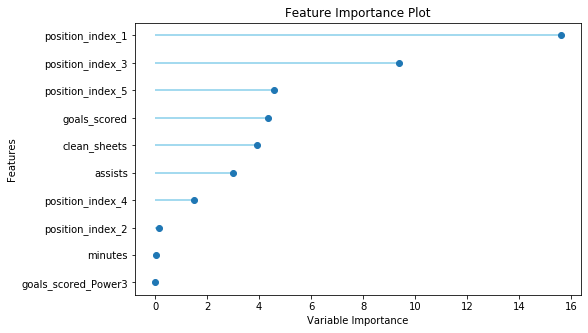

In [7]:
plot_model(fpl_lr, plot = 'feature')

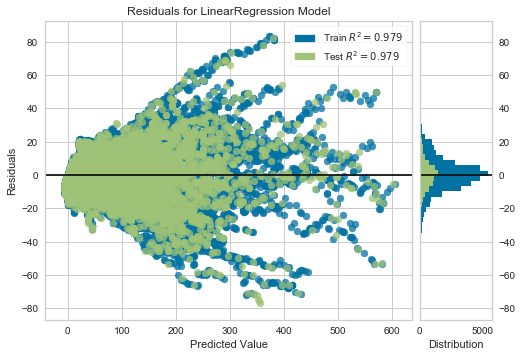

In [8]:
plot_model(fpl_lr, plot = 'residuals')

In [9]:
save_model(fpl_lr, model_name = "Fantasy_predictive_model")

Transformation Pipeline and Model Succesfully Saved
